# Predicting Hotel Cancellations

## 🏨 Background

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

## The Data

They have provided you with their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [1]:
import pandas as pd
hotels = pd.read_csv("data/hotel_bookings.csv")

## The Challenge

* Use your skills to produce recommendations for the hotel on what factors affect whether customers cancel their booking.

## Time is ticking. Good luck! 

# **Explore**

### **Import Libraries**

In [ ]:
pip install category_encoders

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from category_encoders import OneHotEncoder

In [3]:
hotels.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled
5,INN00006,2.0,0.0,0.0,2.0,Meal Plan 2,0.0,Room_Type 1,346.0,2018.0,9.0,13.0,Online,0.0,0.0,0.0,115.00,1.0,Canceled
6,INN00007,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,34.0,2017.0,10.0,15.0,Online,0.0,0.0,0.0,107.55,1.0,Not_Canceled
7,INN00008,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 4,83.0,2018.0,12.0,26.0,Online,0.0,0.0,0.0,105.61,1.0,Not_Canceled
8,INN00009,3.0,0.0,0.0,4.0,Meal Plan 1,0.0,Room_Type 1,121.0,2018.0,7.0,6.0,Offline,0.0,0.0,0.0,96.90,1.0,Not_Canceled
9,INN00010,2.0,0.0,0.0,5.0,Meal Plan 1,0.0,Room_Type 4,44.0,2018.0,10.0,18.0,Online,0.0,0.0,0.0,133.44,3.0,Not_Canceled


In [4]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

In [5]:
# Replace booking_status to binary numerical values
mapping = {'booking_status':{'Canceled': 0, 'Not_Canceled': 1}}
hotels.replace(mapping, inplace=True)
hotels.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,1
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,0
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,0
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,0


In [6]:
# Replace repeated_guest and booking_status to boolean values
hotels['booking_status'] = hotels['booking_status'].astype('bool').astype('int')
hotels['repeated_guest'] = hotels['repeated_guest'].astype('bool')

In [7]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

In [8]:
# Explore null values
hotels.isnull().sum() / len(hotels) * 100

Booking_ID                              0.000000
no_of_adults                            1.138525
no_of_children                          0.893177
no_of_weekend_nights                    1.011716
no_of_week_nights                       2.224673
type_of_meal_plan                       1.450034
required_car_parking_space              7.145417
room_type_reserved                      3.228119
lead_time                               1.301172
arrival_year                            1.042040
arrival_month                           1.389387
arrival_date                            2.704342
market_segment_type                     4.168160
repeated_guest                          0.000000
no_of_previous_cancellations            1.370090
no_of_previous_bookings_not_canceled    1.516196
avg_price_per_room                      1.268091
no_of_special_requests                  2.175052
booking_status                          0.000000
dtype: float64

In [9]:
hotels.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,1
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,False,0.0,0.0,106.68,1.0,1
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,False,0.0,0.0,60.00,0.0,0
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,False,0.0,0.0,100.00,0.0,0
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,False,0.0,0.0,94.50,0.0,0


<AxesSubplot: >

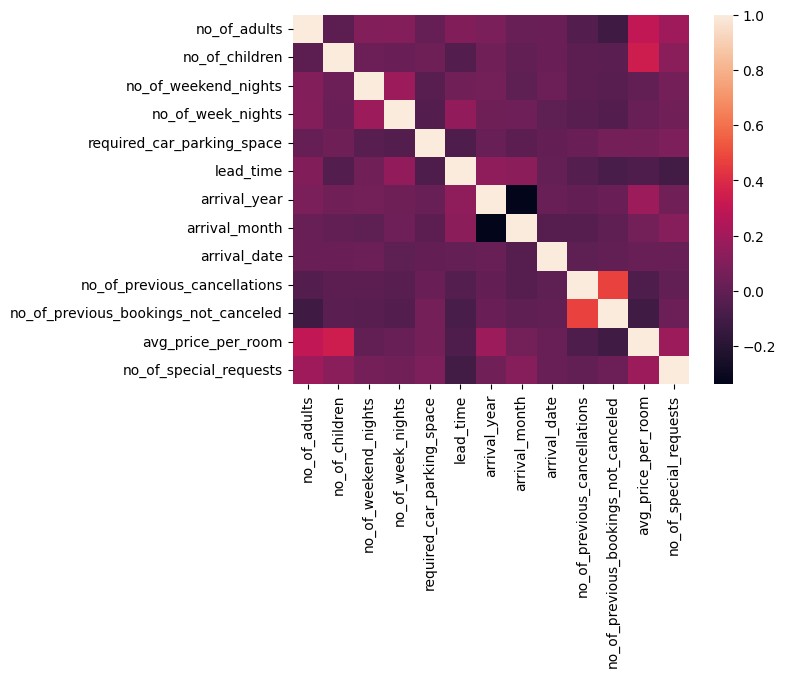

In [10]:
# Create correlation matrix for numerical features
correlation = hotels.select_dtypes('number').drop(columns='booking_status').corr()
sns.heatmap(correlation)

As can be seen from the above correlation heat map, there is some correlation between the number of previous bookings canceled and not canceled. The correlation is not that strong, so we will keep these features.

Let's see what the distribution of people with previous bookings for booking cancelations.

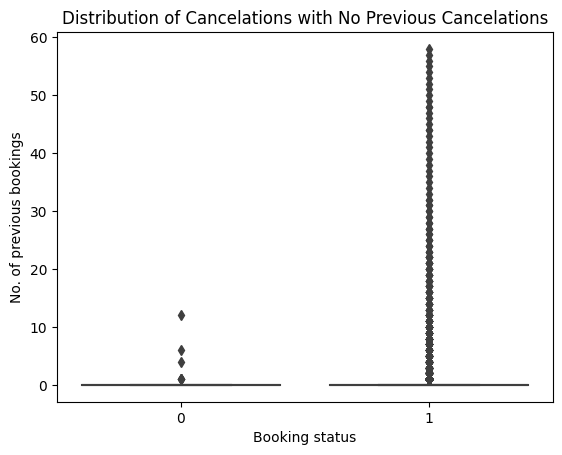

In [11]:
# Create boxplot
sns.boxplot(x="booking_status", y="no_of_previous_bookings_not_canceled", data=hotels)
# Label axes
plt.xlabel("Booking status")
plt.ylabel("No. of previous bookings")
plt.title("Distribution of Cancelations with No Previous Cancelations");

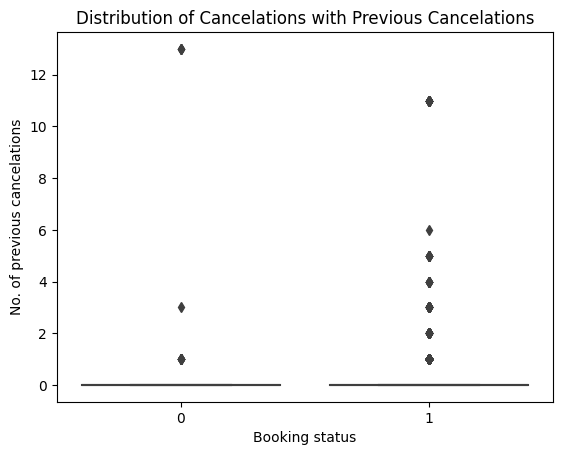

In [12]:
# Create boxplot
sns.boxplot(x="booking_status", y="no_of_previous_cancellations", data=hotels)
# Label axes
plt.xlabel("Booking status")
plt.ylabel("No. of previous cancelations")
plt.title("Distribution of Cancelations with Previous Cancelations");

What about lead time?

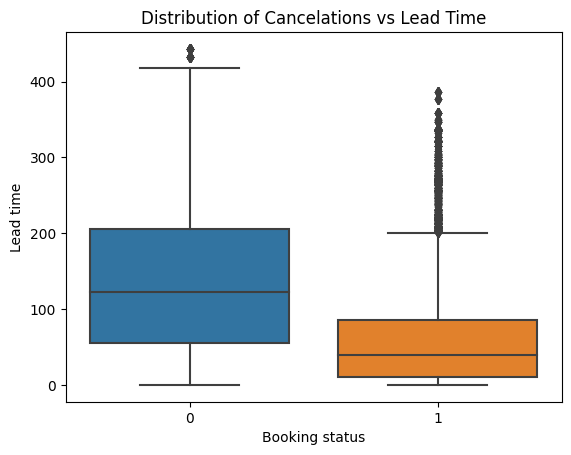

In [13]:
# Create boxplot
sns.boxplot(x="booking_status", y="lead_time", data=hotels)
# Label axes
plt.xlabel("Booking status")
plt.ylabel("Lead time")
plt.title("Distribution of Cancelations vs Lead Time");

As shown above, there's some correlation between lead times and booking cancelations.

Looking at the class balance between the booking cancelations below, we can see that there are more bookings that were not canceled.

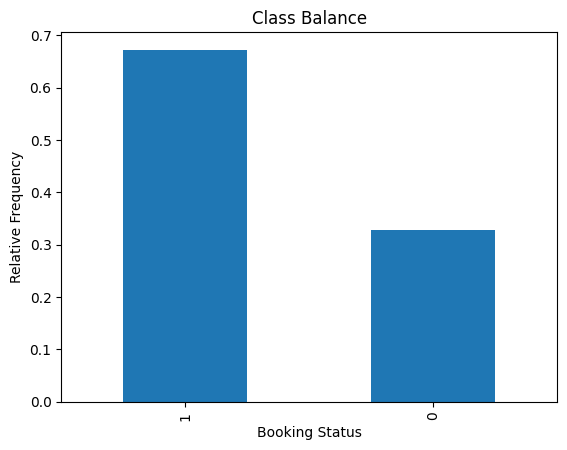

In [14]:
# Plot value counts of booking_status
hotels['booking_status'].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Booking Status", ylabel="Relative Frequency", title="Class Balance"
);

In [15]:
majority_class_prop, minority_class_prop = hotels['booking_status'].value_counts(normalize=True)
print(majority_class_prop, minority_class_prop)

0.6723638869745003 0.32763611302549966


Are there more cancelations depending on the room type reserved?

In [16]:
# Create room type pivot table
room_type_pivot = pd.pivot_table(
    hotels, index='room_type_reserved', values='booking_status', aggfunc=np.mean
).sort_values(by='booking_status')
room_type_pivot

,booking_status
room_type_reserved,
Room_Type 6,0.578275
Room_Type 4,0.658520
Room_Type 3,0.666667
Room_Type 2,0.671687
Room_Type 1,0.677278
Room_Type 5,0.726562
Room_Type 7,0.772727


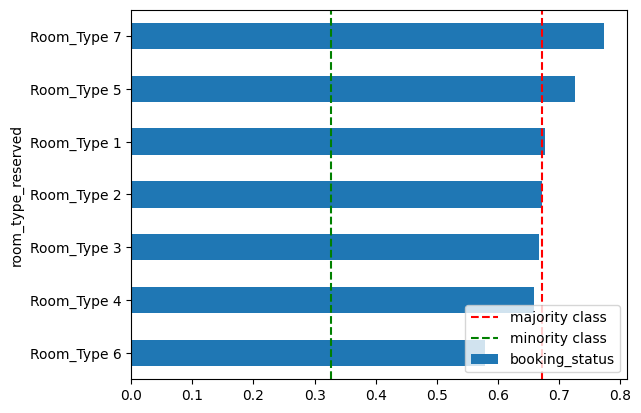

In [17]:
# Plot bar chart of `room_type_pivot`
room_type_pivot.plot(kind="barh", legend=None)
plt.axvline(
    majority_class_prop, linestyle="--", color="red", label="majority class"
)
plt.axvline(
    minority_class_prop, linestyle="--", color="green", label="minority class"
)
plt.legend(loc="lower right");

Bookings for Room Types 1, 5, and 7 are more likely to be canceled.

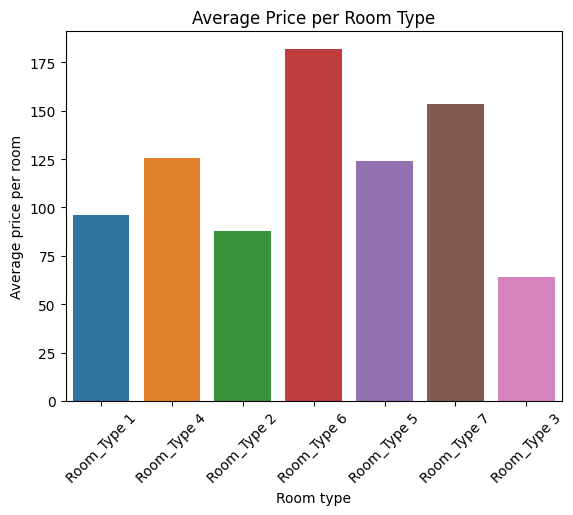

In [18]:
# Create barplot of room type vs average price
sns.barplot(x="room_type_reserved", y="avg_price_per_room", data=hotels, ci=None)
# Label axes
plt.xlabel("Room type")
plt.xticks(rotation=45)
plt.ylabel("Average price per room")
plt.title("Average Price per Room Type");

In [19]:
hotels.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3905
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [74]:
hotels['market_segment_type'].unique()

array([nan, 'Online', 'Offline', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [30]:
hotels.dropna(how='any')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,False,0.0,0.0,106.68,1.0,1
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,False,0.0,0.0,60.00,0.0,0
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,False,0.0,0.0,100.00,0.0,0
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,False,0.0,0.0,94.50,0.0,0
5,INN00006,2.0,0.0,0.0,2.0,Meal Plan 2,0.0,Room_Type 1,346.0,2018.0,9.0,13.0,Online,False,0.0,0.0,115.00,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36268,INN36269,1.0,0.0,0.0,3.0,Meal Plan 1,0.0,Room_Type 1,166.0,2018.0,11.0,1.0,Offline,False,0.0,0.0,110.00,0.0,0
36269,INN36270,2.0,2.0,0.0,1.0,Meal Plan 1,0.0,Room_Type 6,0.0,2018.0,10.0,6.0,Online,False,0.0,0.0,216.00,0.0,0
36271,INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,228.0,2018.0,10.0,17.0,Online,False,0.0,0.0,90.95,2.0,0
36272,INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0.0,Room_Type 1,148.0,2018.0,7.0,1.0,Online,False,0.0,0.0,98.39,2.0,1


In [23]:
hotels.shape

(36275, 19)

In [31]:
hotels.dropna(how='any').shape

(27511, 19)

In [24]:
hotels.isnull().sum()

Booking_ID                                 0
no_of_adults                             413
no_of_children                           324
no_of_weekend_nights                     367
no_of_week_nights                        807
type_of_meal_plan                        526
required_car_parking_space              2592
room_type_reserved                      1171
lead_time                                472
arrival_year                             378
arrival_month                            504
arrival_date                             981
market_segment_type                     1512
repeated_guest                             0
no_of_previous_cancellations             497
no_of_previous_bookings_not_canceled     550
avg_price_per_room                       460
no_of_special_requests                   789
booking_status                             0
dtype: int64

In [32]:
hotels.dropna(how='any').isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

# **Split Data for Training**

In [33]:
# Drop instances with null values
hotels_noNA = hotels.dropna(how='any')

In [34]:
target = 'booking_status'
features = hotels_noNA.drop(columns=['Booking_ID',target]).columns.values
X = hotels_noNA[features]
y = hotels_noNA[target]

In [35]:
print('The shape of X is:',X.shape)
print('The shape of y is:',y.shape)

The shape of X is: (27511, 17)
The shape of y is: (27511,)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1 
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (22008, 17)
y_train shape: (22008,)
X_test shape: (5503, 17)
y_test shape: (5503,)


In [37]:
# Baseline accuracy score
baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(baseline, 2))

Baseline Accuracy: 0.67



# **Build Logistic Regression Model**


In [56]:
# Build model
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=1000)
)

In [57]:
# Fit model
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['type_of_meal_plan', 'room_type_reserved',
                                     'market_segment_type'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [61]:
# Accuracy scores
train_accuracy = accuracy_score(y_train, model.predict(X_train)) # Training accuracy
test_accuracy = model.score(X_test, y_test) # Test accuracy

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8022991639403854
Test Accuracy: 0.7968380883154643


In [62]:
features_i = model.named_steps["onehotencoder"].get_feature_names()
importances = model.named_steps["logisticregression"].coef_[0]

In [64]:
odds_ratios = pd.Series(np.exp(importances), index=features_i).sort_values()
odds_ratios.head()

market_segment_type_Online        0.393639
room_type_reserved_Room_Type 1    0.565397
market_segment_type_Aviation      0.795411
room_type_reserved_Room_Type 4    0.803378
no_of_weekend_nights              0.854772
dtype: float64

In [75]:
odds_ratios

market_segment_type_Online              0.393639
room_type_reserved_Room_Type 1          0.565397
market_segment_type_Aviation            0.795411
room_type_reserved_Room_Type 4          0.803378
no_of_weekend_nights                    0.854772
no_of_adults                            0.872314
no_of_previous_cancellations            0.890140
no_of_children                          0.898282
type_of_meal_plan_Meal Plan 2           0.937068
no_of_week_nights                       0.949059
type_of_meal_plan_Not Selected          0.949736
avg_price_per_room                      0.981139
lead_time                               0.983842
type_of_meal_plan_Meal Plan 3           0.990479
room_type_reserved_Room_Type 3          0.991686
arrival_date                            0.999847
arrival_year                            1.002112
arrival_month                           1.058519
market_segment_type_Complementary       1.075019
market_segment_type_Corporate           1.082520
room_type_reserved_R

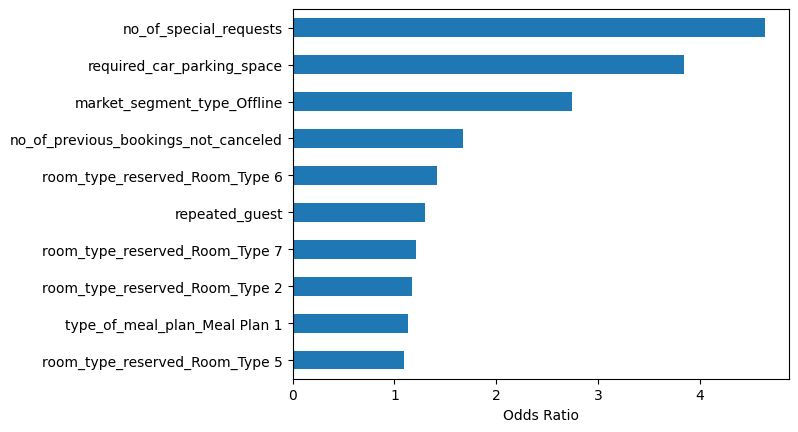

In [73]:
# Horizontal bar chart, of odds ratios
odds_ratios.tail(10).plot(kind='barh')
plt.xlabel("Odds Ratio");

# **Conclusion**

The odds ratio chart above shows the top 10 features that provide an idea of which bookings are likely to be canceled.

For instance, the top 3 are:
1. Number of special request: A booking is more than 4 times more likely to be canceled the more special requests are made.
2. Number of required parking space: A booking is more than 3 times more likely to be canceled the more parking spaces are required by the guest.
3. Offline market segment type: Bookings made offline are more than 2 times more likely to be canceled.